In [2]:
import pandas as pd
import numpy as np
import os
os.chdir("F:\\blogfeedback")

In [5]:
train=pd.read_csv("blogData_train.csv")

In [6]:
train.head()

,a,b,c,d,e,f,g,h,i,j,...,pc,pd,pe,pf,pg,ph,pi,pj,pk,pl
0,40.30467,53.845657,0,401,15.0,15.52416,32.44188,0,377,3.0,...,0,1,0,0,0,0,0,0,0.0,1
1,40.30467,53.845657,0,401,15.0,15.52416,32.44188,0,377,3.0,...,1,0,0,0,0,0,0,0,0.0,0
2,40.30467,53.845657,0,401,15.0,15.52416,32.44188,0,377,3.0,...,1,0,0,0,0,0,0,0,0.0,0
3,40.30467,53.845657,0,401,15.0,15.52416,32.44188,0,377,3.0,...,0,1,0,0,0,0,0,0,0.0,1
4,40.30467,53.845657,0,401,15.0,15.52416,32.44188,0,377,3.0,...,0,1,0,0,0,0,0,0,0.0,27


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [8]:
train.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       ...
       'pc', 'pd', 'pe', 'pf', 'pg', 'ph', 'pi', 'pj', 'pk', 'pl'],
      dtype='object', length=281)

In [9]:
train.isna().sum()

a     0
b     0
c     0
d     0
e     0
f     0
g     0
h     0
i     0
j     0
k     0
l     0
m     0
n     0
o     0
p     0
q     0
r     0
s     0
t     0
u     0
v     0
w     0
x     0
y     0
z     0
aa    0
bb    0
cc    0
dd    0
     ..
mg    0
mh    0
mi    0
mj    0
mk    0
ml    0
mo    0
mp    0
mq    0
mr    0
ms    0
mt    0
mu    0
mv    0
mw    0
mx    0
my    0
mz    0
pa    0
pb    0
pc    0
pd    0
pe    0
pf    0
pg    0
ph    0
pi    0
pj    0
pk    0
pl    0
Length: 281, dtype: int64

In [11]:
train_dataset = train.sample(frac=0.8,random_state=0)
test_dataset = train.drop(train_dataset.index)

In [12]:
#Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.
train_labels = train_dataset.pop('pl')
test_labels = test_dataset.pop('pl')

In [33]:
def build_model():
    model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [34]:
#Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.
model = build_model()

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               28100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 38,301
Trainable params: 38,301
Non-trainable params: 0
_________________________________________________________________


In [36]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[ -31.240261 ],
       [ -31.259947 ],
       [   3.7447412],
       [  17.99861  ],
       [ -27.175425 ],
       [ -50.417683 ],
       [-108.194046 ],
       [ -19.88004  ],
       [ -81.60393  ],
       [ -14.761771 ]], dtype=float32)

In [37]:

#Train the model for 1000 epochs, and record the training and validation accuracy in the history object.
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [38]:
#Visualize the model's training progress using the stats stored in the history object.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,556.367037,6.528475,556.366821,639.938915,6.477328,639.938904,995
996,532.088606,6.460747,532.088745,687.901474,6.606259,687.901184,996
997,560.533560,6.482395,560.533630,782.443266,7.322167,782.443115,997
998,546.015452,6.570694,546.015686,637.101130,6.858149,637.101135,998
999,552.509618,6.550330,552.509949,701.699359,6.971899,701.699158,999


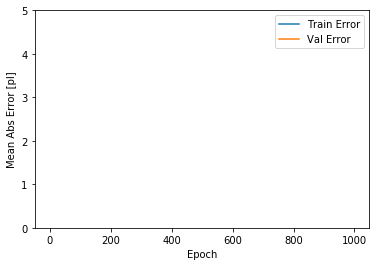

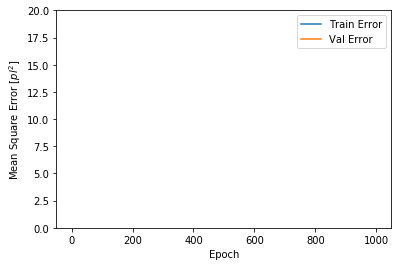

In [39]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [pl]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$pl^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

In [40]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])




..........................................

In [32]:
#Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} pl".format(mae))

10479/10479 - 1s - loss: 868.0082 - mean_absolute_error: 6.9990 - mean_squared_error: 868.0085
Testing set Mean Abs Error:  7.00 pl


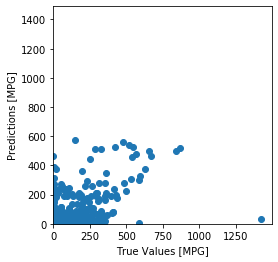

In [41]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [42]:
from sklearn.metrics import mean_squared_error
pred= model.predict(test_dataset)
score = np.sqrt(mean_squared_error(test_labels,pred))
print (score)

29.311301178569487
